<a href="https://colab.research.google.com/github/VitorThome10/Ciencia_de_dados_Python/blob/main/Simulacao_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from numpy import linalg as LA
import yfinance as yf

In [3]:
## Calculando dados

lista_acoes = ['WEGE3', 'TAEE11', 'PRIO3', 'PETR4', 'VALE3']
lista_acoes = [acao+ '.SA' for acao in lista_acoes]

data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days=300)


precos = yf.download(lista_acoes, data_inicial, data_final)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [4]:
retornos = precos.pct_change().dropna()
matriz_covarianca = retornos.cov()
pesos_carteira = np.full(len(lista_acoes), 1/len(lista_acoes))
numero_acoes = len(lista_acoes)

In [5]:
numero_de_simulações = 10000
dias_projetados = 252*3
capital_inicial = 1000

In [6]:
retornos_medio = retornos.mean(axis = 0).to_numpy()
matriz_retorno_medio = retornos_medio * np.ones(shape = (dias_projetados, numero_acoes))



In [7]:
L = LA.cholesky(matriz_covarianca)
L

array([[ 0.02177128,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00633501,  0.02235773,  0.        ,  0.        ,  0.        ],
       [ 0.00221955,  0.00044335,  0.00986401,  0.        ,  0.        ],
       [ 0.00410978,  0.00361512, -0.00080768,  0.01642544,  0.        ],
       [ 0.0009034 ,  0.00324848,  0.0028331 ,  0.00135457,  0.01424662]])

In [8]:
retornos_carteira = np.zeros([dias_projetados, numero_de_simulações]) # Cada coluna é uma simulacao
montante_final = np.zeros(numero_de_simulações)

for s in range(numero_de_simulações):
    Rpdf = np.random.normal(size=(dias_projetados, numero_acoes))


    retornos_sintéticos = matriz_retorno_medio + np.inner(Rpdf, L) # Unica coisa aleatória é o Rpdf

    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sintéticos)+ 1) *capital_inicial
    montante_final[s] = retornos_carteira[-1, s]

montante_final

array([1889.95354541, 1674.17261471, 1770.63215144, ..., 1771.38933313,
       1361.67107957, 1561.95858781])

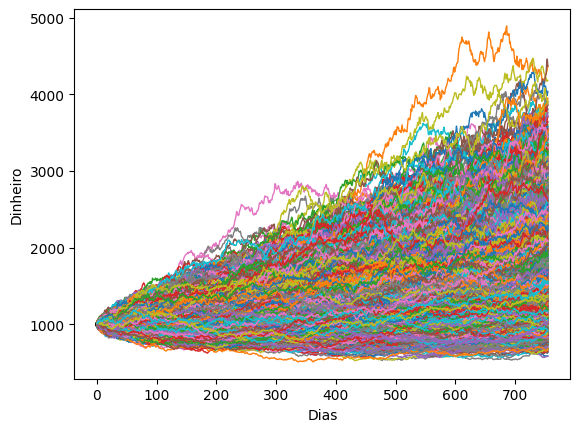

In [9]:
plt.plot(retornos_carteira, linewidth = 1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')

plt.show()

In [10]:
montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenariosComLucro = str((len(montante_final[montante_final > 1000]) /
                       len(montante_final))* 100) + '%'

In [11]:
print( f''' Ao investir R$ 1000 reais na carteira {lista_acoes},
podemos esperar esses resultados para os próximos 3 anos,
utilizando o método de Monte Carlo com 10 mil simulações:
com 50% de probabilidade, o montante sera maior que R$ {montante_mediano},
com 95% de probabilidade, o montante será maior que R$ {montante_95},
Com 99% de probabilidade, o montante será maior que R$ {montante_99}
Em {cenariosComLucro} dos cenários, foi  possível obter lucro nos próximos 3 anos ''')

 Ao investir R$ 1000 reais na carteira ['WEGE3.SA', 'TAEE11.SA', 'PRIO3.SA', 'PETR4.SA', 'VALE3.SA'], 
podemos esperar esses resultados para os próximos 3 anos, 
utilizando o método de Monte Carlo com 10 mil simulações: 
com 50% de probabilidade, o montante sera maior que R$ 1631.2903682036133,
com 95% de probabilidade, o montante será maior que R$ 1017.6950162930638,
Com 99% de probabilidade, o montante será maior que R$ 838.5361993884699
Em 95.71% dos cenários, foi  possível obter lucro nos próximos 3 anos 


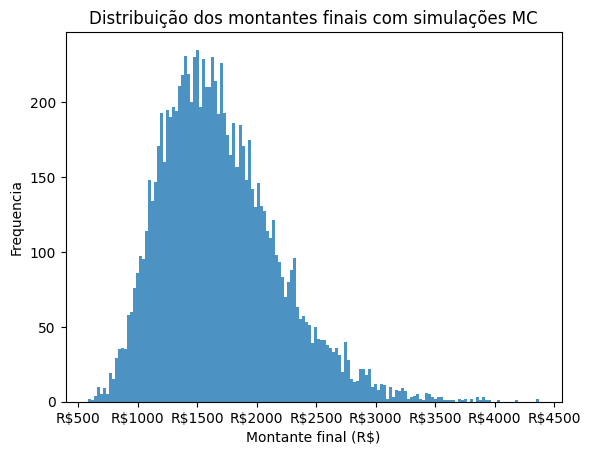

In [12]:
config = dict(histtype = 'stepfilled', alpha = 0.8, density = False, bins = 150)
fig, ax = plt.subplots()
ax.hist(montante_final, **config)
ax.xaxis.set_major_formatter('R${x:.0f}')
plt.title('Distribuição dos montantes finais com simulações MC')
plt.xlabel('Montante final (R$)')
plt.ylabel("Frequencia")
plt.show()

Códico baseado no mestre Breno Sulivan